<a href="https://colab.research.google.com/github/Diogoa83/desafio_mutual/blob/main/Analise_com_predi%C3%A7%C3%B5es_com_produto_convenio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [2]:
import mplcyberpunk
import pandas as pd
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [91]:
import statsmodels.api as sm


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Dados/Producao.csv', sep=';')


In [298]:
df = pd.read_excel('/content/Producao.xlsx')

In [ ]:
df

In [300]:
df

,DataPagamentoCMS,Numero_Corretor,Tipo_De_Operacao,Tipo_De_Produto,Banco_Operacao,Orgao_Operacao,Convenio_categoria,Operacao_original,orgão_original,ValorBase,Tipo_Producao
0,2022-03-09,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,PREFEITURAS - AL,PREFEITURAS,Margem Livre (Novo),PREF. DE MACEIÓ - AL,-5189.14,Lançamentos SimCach
1,2022-03-09,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,PREFEITURAS - BA,PREFEITURAS,Margem Livre (Novo),PREF. DE VITÓRIA DA CONQUISTA - BA,-3030.60,Lançamentos SimCach
2,2022-03-09,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,FEDERAL,FEDERAL,Margem Livre (Novo),FEDERAL,-3316.92,Lançamentos SimCach
3,2022-03-09,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,INSS,INSS,Margem Livre (Novo),INSS,-12246.03,Lançamentos SimCach
4,2021-12-31,NaN,NAO INFORMADO,NAO INFORMADO,BANCO PAN,OUTROS,OUTROS,NÃO INFORMADO,NÃO INFORMADO,0.00,SUB
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2021-06-24,9394.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO PAN,INSS,INSS,Margem Livre (Novo),INSS,4497.49,FF
1048571,2021-06-24,9394.0,SAQUE COMPLEMENTAR,CARTAO CONSIGNADO,BANCO PAN,INSS,INSS,Cartão c/ saque complementar à vista,INSS,1686.00,FF
1048572,2021-06-24,9394.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO C6 BANK,INSS,INSS,Margem Livre (Novo),INSS,-3101.74,Lançamentos
1048573,2021-06-24,9394.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO BRADESCO,INSS,INSS,Margem Livre (Novo),INSS,-4453.70,Lançamentos


In [301]:
df.shape

(1048575, 11)

# **Analisar uma serie historica do valor base de cada produto/Convenio e suas projeções, e quanto cada taxa externa impacta na produtividade destes produtos.**



In [302]:
# alterando nome da coluna data para fazer merge futuramente
df = df.rename(columns={'DataPagamentoCMS': 'Data'})

In [303]:
df.shape

(1048575, 11)

In [304]:
df.isna().sum()

Data                     0
Numero_Corretor         41
Tipo_De_Operacao         0
Tipo_De_Produto        114
Banco_Operacao         114
Orgao_Operacao           0
Convenio_categoria       0
Operacao_original      114
orgão_original         120
ValorBase             5135
Tipo_Producao            0
dtype: int64

In [305]:
#removendo os valores nulos ou vazios
df = df.dropna(subset=['Numero_Corretor', 'Tipo_De_Operacao', 'Tipo_De_Produto', 'Banco_Operacao', 'Orgao_Operacao', 'Convenio_categoria', 'Operacao_original', 'orgão_original', 'ValorBase', 'Tipo_Producao'])


In [307]:
#converter colunas para DateTime e numerica respectivamente
df['Data'] = pd.to_datetime(df['Data'])

df['ValorBase'] = pd.to_numeric(df['ValorBase'], errors='coerce')


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043279 entries, 41 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Data                1043279 non-null  datetime64[ns]
 1   Numero_Corretor     1043279 non-null  float64       
 2   Tipo_De_Operacao    1043279 non-null  object        
 3   Tipo_De_Produto     1043279 non-null  object        
 4   Banco_Operacao      1043279 non-null  object        
 5   Orgao_Operacao      1043279 non-null  object        
 6   Convenio_categoria  1043279 non-null  object        
 7   Operacao_original   1043279 non-null  object        
 8   orgão_original      1043279 non-null  object        
 9   ValorBase           1043279 non-null  float64       
 10  Tipo_Producao       1043279 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 95.5+ MB


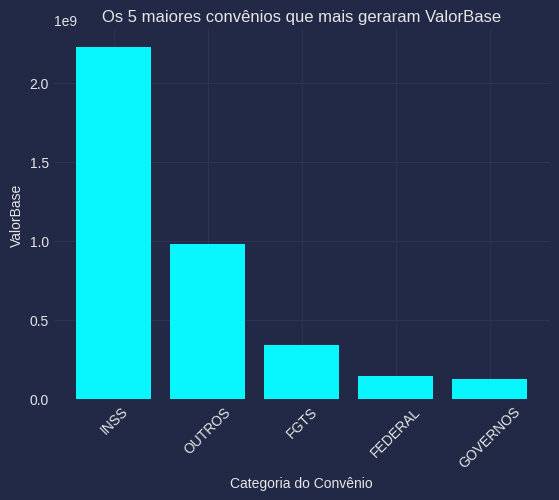

In [309]:


# Ordenar o DataFrame pelos valores de ValorBase em ordem decrescente
df_sorted = df.groupby('Convenio_categoria')['ValorBase'].sum().reset_index().sort_values('ValorBase', ascending=False)

# Obter os 5 maiores convênios que mais geraram ValorBase
maiores_convenios = df_sorted.nlargest(5, 'ValorBase')

# Criar o gráfico de barras
plt.bar(maiores_convenios['Convenio_categoria'], maiores_convenios['ValorBase'])
plt.xlabel('Categoria do Convênio')
plt.ylabel('ValorBase')
plt.title('Os 5 maiores convênios que mais geraram ValorBase')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


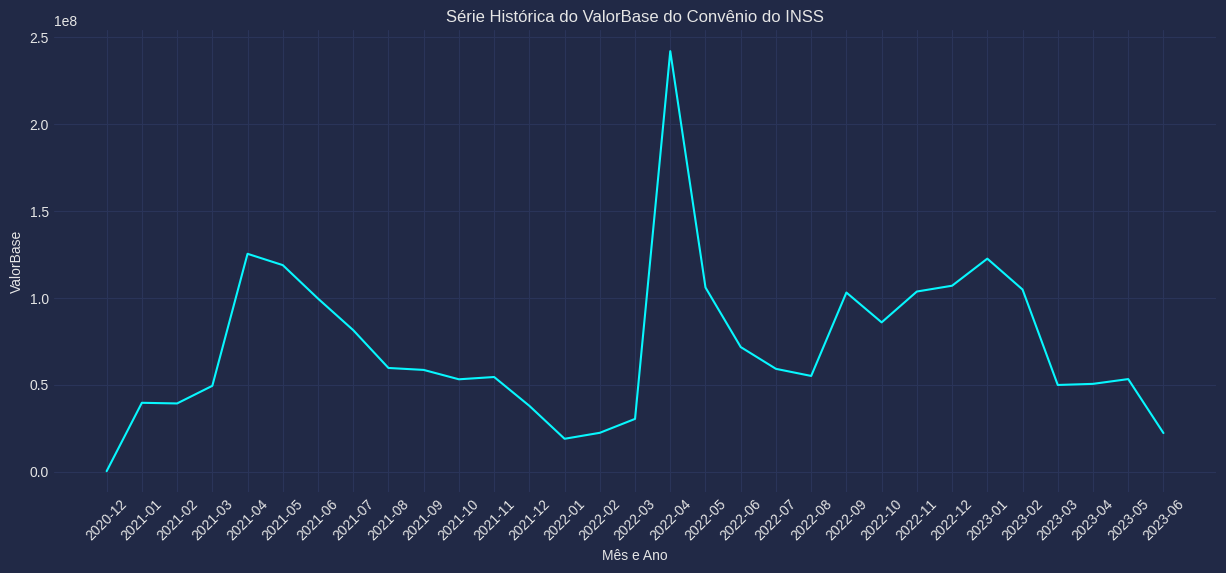

In [310]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Filtrar os dados do convênio do INSS
convenio_inss = df[df['Convenio_categoria'] == 'INSS']

# Agrupar os dados por mês e calcular a soma do ValorBase
convenio_inss_agrupado = convenio_inss.groupby('MesAno')['ValorBase'].sum()

fig = plt.figure(figsize=(15, 6))

# Converter o índice para string
convenio_inss_agrupado.index = convenio_inss_agrupado.index.astype(str)

# Criar o gráfico da série histórica
plt.plot(convenio_inss_agrupado.index, convenio_inss_agrupado.values)
plt.xlabel('Mês e Ano')
plt.ylabel('ValorBase')
plt.title('Série Histórica do ValorBase do Convênio do INSS')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()




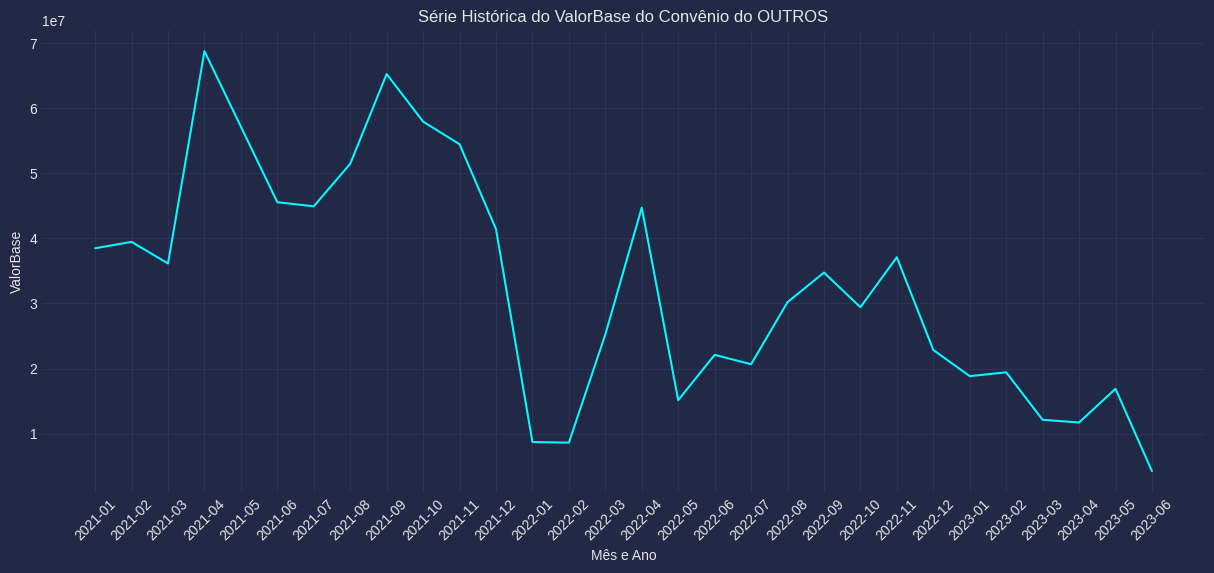

In [311]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Filtrar os dados do convênio do INSS
convenio_inss = df[df['Convenio_categoria'] == 'OUTROS']

# Agrupar os dados por mês e calcular a soma do ValorBase
convenio_inss_agrupado = convenio_inss.groupby('MesAno')['ValorBase'].sum()

# Converter o índice para string
convenio_inss_agrupado.index = convenio_inss_agrupado.index.astype(str)

fig = plt.figure(figsize=(15, 6))
# Criar o gráfico da série histórica
plt.plot(convenio_inss_agrupado.index, convenio_inss_agrupado.values)
plt.xlabel('Mês e Ano')
plt.ylabel('ValorBase')
plt.title('Série Histórica do ValorBase do Convênio do OUTROS')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


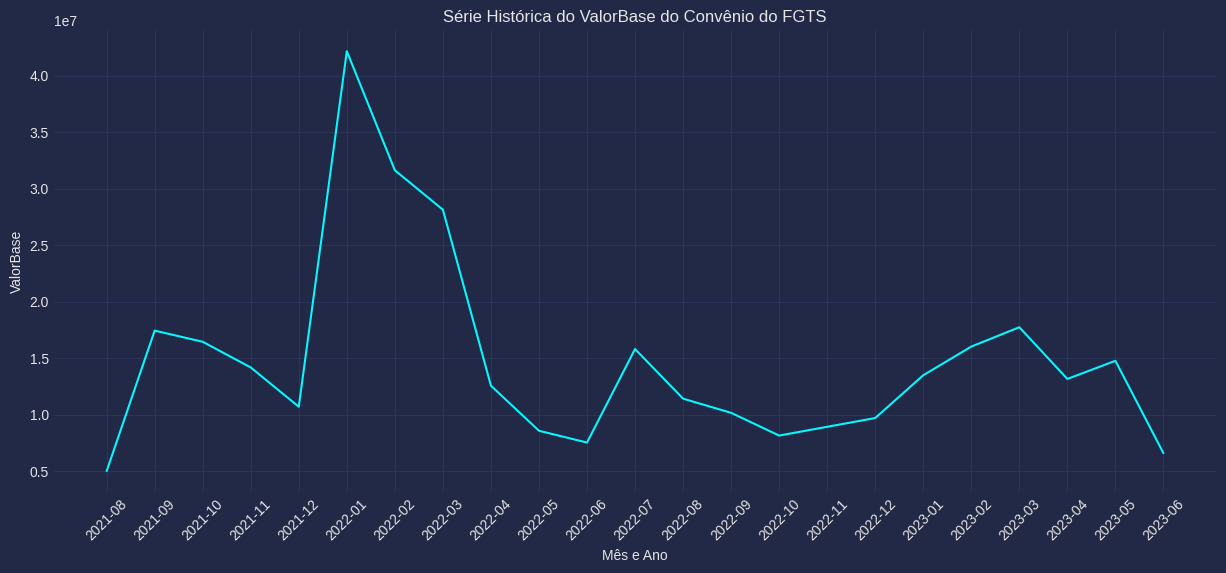

In [312]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Filtrar os dados do convênio do INSS
convenio_inss = df[df['Convenio_categoria'] == 'FGTS']

# Agrupar os dados por mês e calcular a soma do ValorBase
convenio_inss_agrupado = convenio_inss.groupby('MesAno')['ValorBase'].sum()

# Converter o índice para string
convenio_inss_agrupado.index = convenio_inss_agrupado.index.astype(str)

fig = plt.figure(figsize=(15, 6))
# Criar o gráfico da série histórica
plt.plot(convenio_inss_agrupado.index, convenio_inss_agrupado.values)
plt.xlabel('Mês e Ano')
plt.ylabel('ValorBase')
plt.title('Série Histórica do ValorBase do Convênio do FGTS')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

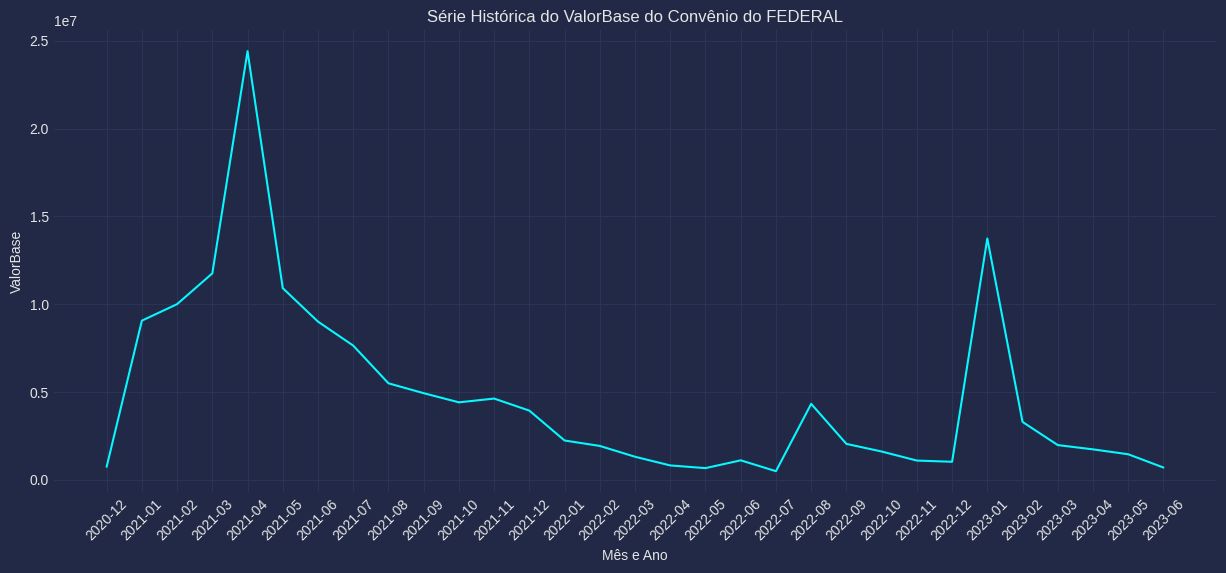

In [313]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Filtrar os dados do convênio do INSS
convenio_Federal = df[df['Convenio_categoria'] == 'FEDERAL']

# Agrupar os dados por mês e calcular a soma do ValorBase
convenio_inss_agrupado = convenio_Federal.groupby('MesAno')['ValorBase'].sum()

# Converter o índice para string
convenio_inss_agrupado.index = convenio_inss_agrupado.index.astype(str)

fig = plt.figure(figsize=(15, 6))
# Criar o gráfico da série histórica
plt.plot(convenio_inss_agrupado.index, convenio_inss_agrupado.values)
plt.xlabel('Mês e Ano')
plt.ylabel('ValorBase')
plt.title('Série Histórica do ValorBase do Convênio do FEDERAL')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [314]:
convenio_Federal['ValorBase'].head(30)

10682     3000.64
10712     3811.55
10875     7917.24
11333    24035.11
11582     1004.15
12354     7146.60
13340     5000.20
14140     1652.04
14288      421.94
14289     3922.20
14290     8005.70
14444     4010.71
14469      619.08
14571      801.69
14583    11282.47
15091    39032.53
15180     9890.05
16523     2742.31
16600     2535.68
16601     1490.74
16625     9409.55
16993     1278.35
17224      321.24
17315     5003.79
17585      298.60
17682    18578.13
17861     3223.00
18022     2197.36
18140     8785.38
18141      774.94
Name: ValorBase, dtype: float64

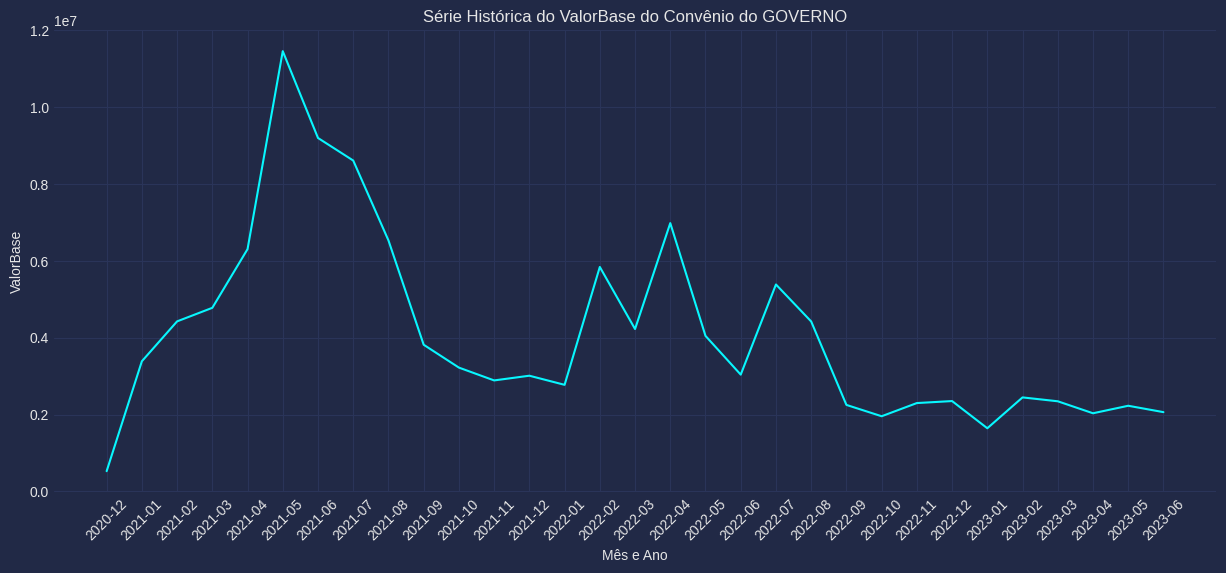

In [315]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Filtrar os dados do convênio do INSS
convenio_governo = df[df['Convenio_categoria'] == 'GOVERNOS']

# Agrupar os dados por mês e calcular a soma do ValorBase
convenio_inss_agrupado = convenio_governo.groupby('MesAno')['ValorBase'].sum()

# Converter o índice para string
convenio_inss_agrupado.index = convenio_inss_agrupado.index.astype(str)

fig = plt.figure(figsize=(15, 6))
# Criar o gráfico da série histórica
plt.plot(convenio_inss_agrupado.index, convenio_inss_agrupado.values)
plt.xlabel('Mês e Ano')
plt.ylabel('ValorBase')
plt.title('Série Histórica do ValorBase do Convênio do GOVERNO')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()



In [ ]:
convenio_governo

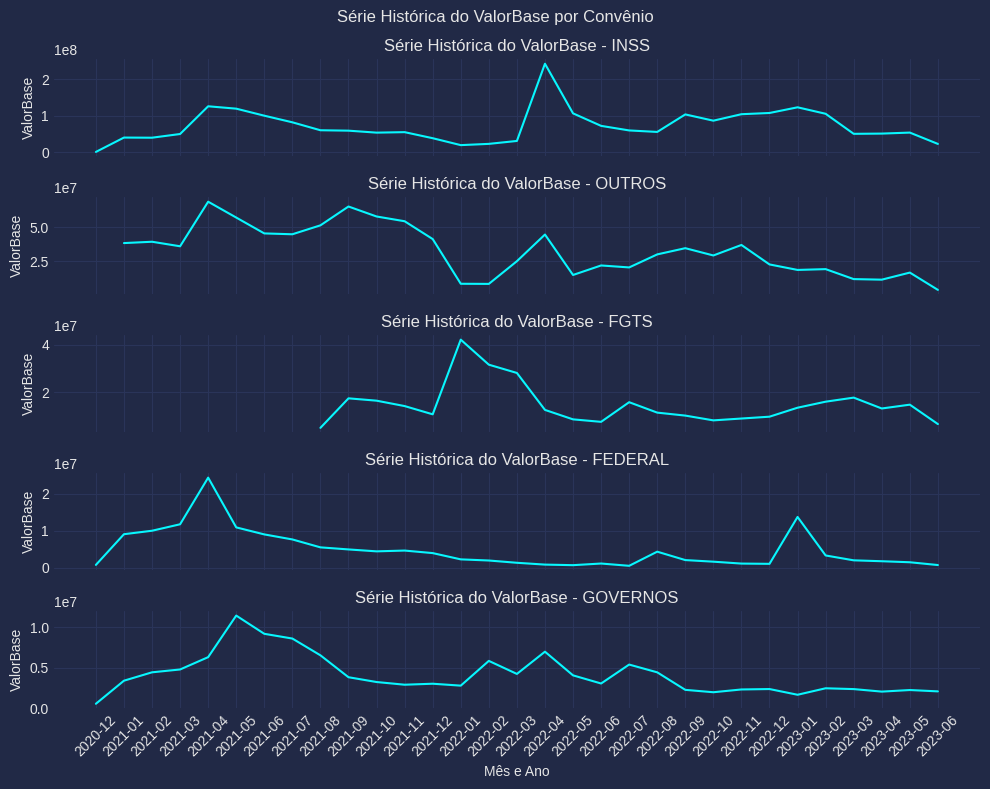

In [222]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna 'DataPagamentoCMS'
df['MesAno'] = df['Data'].dt.to_period('M')

# Criar uma lista com os convenios desejados
convenios = ['INSS', 'OUTROS', 'FGTS', 'FEDERAL', 'GOVERNOS']

# Criar a figura e as subfiguras
fig, axs = plt.subplots(len(convenios), 1, figsize=(10, 8), sharex=True)

# Plotar os gráficos de linha para cada convenio
for i, convenio in enumerate(convenios):
    # Filtrar os dados do convenio atual
    convenio_data = df[df['Convenio_categoria'] == convenio]

    # Agrupar os dados por mês e calcular a soma do ValorBase
    convenio_agrupado = convenio_data.groupby('MesAno')['ValorBase'].sum()

    # Converter o índice para string
    convenio_agrupado.index = convenio_agrupado.index.astype(str)

    # Plotar o gráfico da série histórica do convenio atual
    axs[i].plot(convenio_agrupado.index, convenio_agrupado.values)
    axs[i].set_ylabel('ValorBase')
    axs[i].set_title(f'Série Histórica do ValorBase - {convenio}')

    # Rotacionar os rótulos do eixo x para melhor visualização
    axs[i].tick_params(axis='x', rotation=45)

# Configurar o título global da figura
fig.suptitle('Série Histórica do ValorBase por Convênio')
plt.xlabel('Mês e Ano')

# Ajustar o espaçamento entre as subfiguras
plt.tight_layout()

# Exibir o gráfico
plt.show()



# **EXTRAÇÃO TAXA SELIC**

In [ ]:
#série selic

selic = sgs.get({'selic':432}, start = '2020-01-01')

selic

,selic
Date,
2020-01-01,4.50
2020-01-02,4.50
2020-01-03,4.50
2020-01-04,4.50
2020-01-05,4.50
...,...
2023-06-15,13.75
2023-06-16,13.75
2023-06-17,13.75


<Axes: xlabel='Date'>

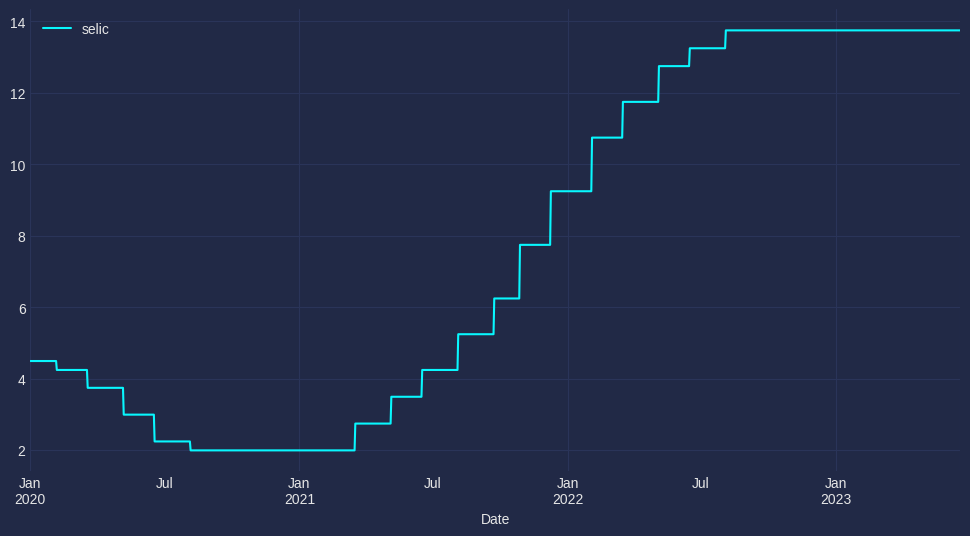

In [ ]:
selic.plot(figsize=(12, 6))

# **Extração Taxa Consignado Banco Central**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#consignado_taxa = pd.read_csv('/content/drive/MyDrive/Dados/historicotaxajurosdiario.csv', sep=';')

In [316]:


taxa = pd.read_csv('/content/serie_historica_taxaconsignadonacional.csv', sep=';', encoding='ISO-8859-1')
taxa

,Data,taxa_mensal_consignado
0,01/12/2020,"1,24"
1,01/01/2021,"1,26"
2,01/02/2021,"1,26"
3,01/03/2021,"1,27"
4,01/04/2021,"1,3"
5,01/05/2021,"1,28"
6,01/06/2021,"1,26"
7,01/07/2021,"1,29"
8,01/08/2021,"1,3"
9,01/09/2021,"1,31"


In [317]:
#Substituir vírgulas por pontos na coluna 'taxa_mensal_consignado'
taxa['taxa_mensal_consignado'] = taxa['taxa_mensal_consignado'].str.replace(',', '.')

# Converter a coluna para o tipo float
taxa['taxa_mensal_consignado'] = taxa['taxa_mensal_consignado'].astype(float)



In [318]:
#taxa['taxa_mensal_consignado'] = taxa['taxa_mensal_consignado'].str.replace(',', '.').astype(float)

# Calcular a correlação entre as colunas "ValorBase" da tabela "produção" e "taxa_mensal_consignado" da tabela "consignado"
correlacao = convenio_Federal['ValorBase'].corr(taxa['taxa_mensal_consignado'])

print("Correlação entre ValorBase e Taxa Mensal de Consignado:", correlacao)


Correlação entre ValorBase e Taxa Mensal de Consignado: nan


In [319]:
taxa['Data'] = pd.to_datetime(taxa['Data'], format='%d/%m/%Y')


In [320]:
taxa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    29 non-null     datetime64[ns]
 1   taxa_mensal_consignado  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 592.0 bytes


In [321]:
df.head(5)

,Data,Numero_Corretor,Tipo_De_Operacao,Tipo_De_Produto,Banco_Operacao,Orgao_Operacao,Convenio_categoria,Operacao_original,orgão_original,ValorBase,Tipo_Producao,MesAno
41,2022-10-17,0.0,AUXILIO BRASIL,AUXILIO BRASIL,BANCO PAN,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,2496.21,SUB,2022-10
42,2022-10-17,0.0,AUXILIO BRASIL,AUXILIO BRASIL,BANCO PAN,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,2496.21,SUB,2022-10
43,2022-10-17,0.0,AUXILIO BRASIL,AUXILIO BRASIL,BANCO PAN,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,2496.21,SUB,2022-10
44,2022-10-17,0.0,AUXILIO BRASIL,AUXILIO BRASIL,BANCO PAN,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,2496.21,SUB,2022-10
45,2022-10-17,0.0,AUXILIO BRASIL,AUXILIO BRASIL,BANCO PAN,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,AUXILIO BRASIL,2496.21,SUB,2022-10


In [322]:
# Mesclar os dataframes com base na coluna 'Data'
data = pd.merge(convenio_Federal, taxa, on='Data')

# Definir as variáveis independentes (X) e a variável dependente (y)
X = data['taxa_mensal_consignado']
y = data['ValorBase']



In [323]:
data.head(5)

,Data,Numero_Corretor,Tipo_De_Operacao,Tipo_De_Produto,Banco_Operacao,Orgao_Operacao,Convenio_categoria,Operacao_original,orgão_original,ValorBase,Tipo_Producao,MesAno,taxa_mensal_consignado
0,2023-03-01,7.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO C6 BANK,FEDERAL,FEDERAL,Margem Livre (Novo),FEDERAL,8245.91,FF,2023-03,1.86
1,2023-03-01,638.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO C6 BANK,FEDERAL,FEDERAL,NOVO,FEDERAL,4000.00,SUB,2023-03,1.86
2,2023-03-01,1636.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO C6 BANK,FEDERAL,FEDERAL,Margem Livre (Novo),FEDERAL,9077.48,FF,2023-03,1.86
3,2023-03-01,1937.0,NOVO,EMPRESTIMO CONSIGNADO,BANCO PAN,FEDERAL,FEDERAL,Margem Livre (Novo),FEDERAL,4734.64,FF,2023-03,1.86
4,2023-03-01,1937.0,REFINANCIAMENTO,EMPRESTIMO CONSIGNADO,BANCO PAN,FEDERAL,FEDERAL,Refinanciamento,FEDERAL,506.39,FF,2023-03,1.86


In [324]:
# Adicionar uma constante aos dados de X
X = sm.add_constant(X)

# Criar e ajustar o modelo de regressão linear
model = sm.OLS(y, X)
results = model.fit()

# Imprimir os resultados da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ValorBase   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.116
Date:                Tue, 20 Jun 2023   Prob (F-statistic):            0.00267
Time:                        03:03:10   Log-Likelihood:                -5380.6
No. Observations:                 488   AIC:                         1.077e+04
Df Residuals:                     486   BIC:                         1.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.11

In [325]:
#REGRESSAO LINEAR
from sklearn.linear_model import LinearRegression

# Definir as variáveis independentes (X) e a variável dependente (y)
X = taxa[['taxa_mensal_consignado']]
y = data['ValorBase']

# Criar o objeto de regressão linear
model = LinearRegression()




In [328]:
# PARA FAZER UMA REGRESSAO LINEAR É PRECISO AGRUPAR OS VALORESBASE POR MES
X.shape, y.shape

((29, 1), (488,))

In [ ]:
# Ajustar o modelo aos dados
model.fit(X, y)

# Obter os coeficientes do modelo
coeficiente = model.coef_
intercept = model.intercept_

# Imprimir os coeficientes
print("Coeficiente:", coeficiente)
print("Intercept:", intercept)